<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


#  Automated Headline Compiler <a class="anchor" id="PSCRAP"></a>



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [4]:
#pip install jupyter_scheduler

## Scheduler set for custom iterations using cron notation for every 30 minutes from 8am to 6pm Monday - Friday

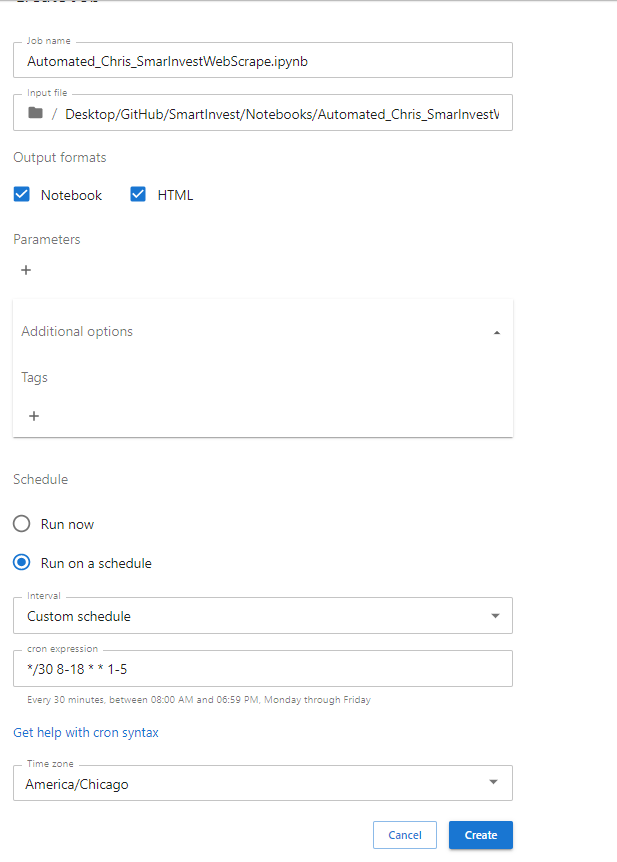

In [ ]:
# Automate Collection 

# NLP Remove stop words
import nltk
from nltk.corpus import stopwords

import pandas as pd
import csv
import requests
from bs4 import BeautifulSoup

# Add date and time to file
import datetime

In [11]:



url = "https://www.cnbc.com/"

def preprocess_data(data):
    # Apply any necessary preprocessing steps
    # Remove characters not recognized by UTF-8
    data = data.encode('utf-8', errors='ignore').decode('utf-8')
    
    # For example, convert text to lowercase or capitalize the first letter of each word
    return data.lower()

     # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in data.split() if word.lower() not in stop_words]
    data = ' '.join(words)
    return data

def append_data_to_csv(url):
    file_path = ('C:/Users/chris/Desktop/GitHub/SmartInvest/Data/ConsolidatedHeadline_CV.csv')

    # Fetch the data from the URL
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract the headlines
    headlines = set()
    for headline in soup.find_all('div', class_="FeaturedCard-contentText"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    for headline in soup.find_all('div', class_="SecondaryCard-headline"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    for headline in soup.find_all('div', class_="LatestNews-headlineWrapper"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    # Process the headlines
    processed_headlines = [preprocess_data(headline) for headline in headlines]

    # Append the data to the CSV file
    with open(file_path, "a", newline="") as file:
        writer = csv.writer(file)

        # Check for duplicates before writing
        existing_headlines = set()
        try:
            with open(file_path, "r") as existing_file:
                existing_data = csv.reader(existing_file)
                for row in existing_data:
                    existing_headlines.update(row)
        except FileNotFoundError:
            pass

        new_headlines = set(processed_headlines) - set(existing_headlines)
        if new_headlines:
            # Add date and time block to each headline
            current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            headlines_with_datetime = [(headline, current_datetime) for headline in new_headlines]
            
            writer.writerows(headlines_with_datetime)

            

URL = "https://www.cnbc.com/"
append_data_to_csv(URL)


# To Assess Data and Check progress run "import pandas as pd" then the following two lines. 
## This will display the most recent headlines added to the "ConsolidatedHeadline_CV.csv"

In [4]:
import pandas as pd

In [5]:
test = pd.read_csv('C:/Users/chris/Desktop/GitHub/SmartInvest/Data/ConsolidatedHeadline_CV.csv',encoding='latin-1')

In [7]:
test.tail(10)

,ï»¿,"debt ceiling negotiators make progress on spending, but still have 'major issues'",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,...,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
3,with emergency savings down and credit card ba...,"home price declines may be over, s&p case-shil...",stocks making the biggest premarket moves: cha...,"rbc raises year-end stock market forecast, see...","two club stocks get wall street upgrades, send...",china's disappointing rebound could bring in m...,roth sees more than 20% upside for boston beer...,nvidia hits $1 trillion market cap,tesla shares rise as elon musk meets with chin...,debt ceiling bill faces a tough path in the ho...,...,drone attack hits moscow buildings; kyiv endur...,5 things to know before the stock market opens...,atlantic equities says coinbase is the 'best e...,bitcoin rises as investors await vote on tenta...,stablecoin giant tether to mine bitcoin in uru...,jim cramer's top 10 things to watch in the sto...,NaN,NaN,NaN,NaN
4,bernstein gives an under-the-radar way to play...,damar hamlin on how he made the decision to pl...,why this chip stock could be the next nvidia,schwarzenegger: 'no one gives a s--- about' cl...,debt limit bill would speed completion of west...,"market focus will shift back to earnings, says...",theranos founder elizabeth holmes reports to p...,stocks making the biggest moves midday: nvidia...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,schwarzenegger: 'no one gives a s--- about' cl...,what is next with debt deal? wall street econo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"nvidia's ascent continues, while citi says buy...",goldman sachs is cutting jobs again amid wall ...,tim scott pushes bill that would require discl...,proposed debt ceiling deal would cut part of $...,these companies are buying back their shares w...,chatgpt cited 'bogus' cases for a new york fed...,schwarzenegger: 'no one gives a s--- about' cl...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nvidia crosses into $1 trillion market cap bef...,2023-05-30 15:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,what damar hamlin thinks about fear and his de...,2023-05-30 15:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,top 5 trending summer travel destinations 2023...,coinbase stock pops after analyst upgrade. her...,how damar hamlin thinks about fear and his dec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,stocks making the biggest moves after hours: a...,debt ceiling bill poised to clear key house co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,stock futures a